In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
%matplotlib notebook


In [7]:
path = Path('../data')
for f in path.iterdir():
    print(f)

../data/README.md
../data/trades.csv
../data/market_data.csv


In [8]:
market = pd.read_csv(path/'market_data.csv', index_col='Timestamp', parse_dates=True)
trades = pd.read_csv(path/'trades.csv', index_col='Timestamp', parse_dates = True)

<IPython.core.display.Javascript object>


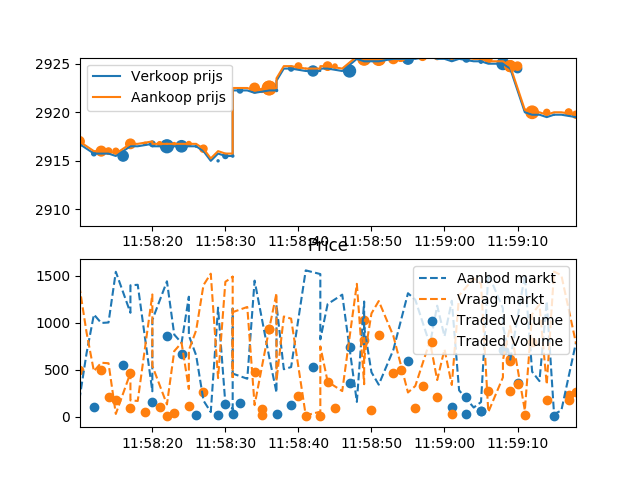

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price')

In [9]:
%matplotlib notebook
index = slice(0,2000)
instrument = 'SP-FUTURE'
plt.figure()
ax1 = plt.subplot(2,1,1)
dat_market = market[market['Instrument'] == instrument][index]
dat_trades = trades[trades['Traded Instrument'] ==instrument][index]
plt.plot(dat_market.index[index],dat_market['Bid Price'][index], label="Verkoop prijs")
plt.plot(dat_market.index[index],dat_market['Ask Price'][index], label ="Aankoop prijs")
plt.legend()

for t in ["BID","ASK"]:
    dat = dat_trades[dat_trades['Traded Side'] == t]
    plt.scatter(dat.index, dat['Traded Price'], label =t, s = dat['Traded Volume']/10)
ax2 = plt.subplot(2,1,2,sharex=ax1)
ax2.plot(dat_market.index[index],dat_market['Bid Volume'][index], '--', label="Aanbod markt")
ax2.plot(dat_market.index[index],dat_market['Ask Volume'][index],'--', label ="Vraag markt")
for t in ["BID","ASK"]:
    dat = dat_trades[dat_trades['Traded Side'] == t]
    ax2.scatter(dat.index, dat['Traded Volume'])
plt.legend()
plt.title("Price")


<IPython.core.display.Javascript object>


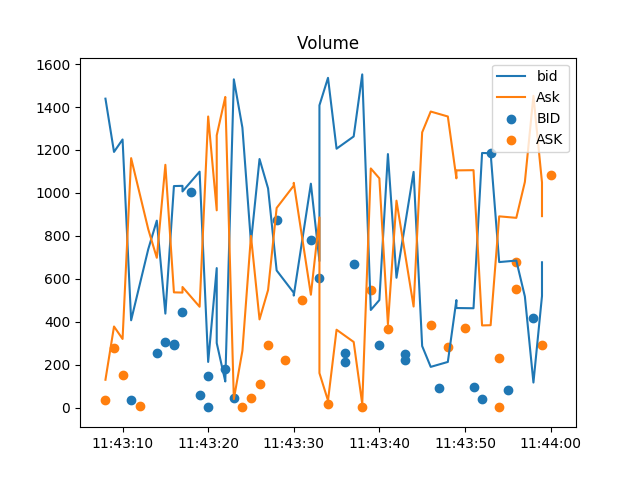

In [10]:
index = slice(0,50)
instrument = 'SP-FUTURE'

plt.figure()
dat_market = market[market['Instrument'] == instrument][index]
dat_trades = trades[trades['Traded Instrument'] ==instrument][index]
plt.plot(dat_market.index[index],dat_market['Bid Volume'][index], label="bid")
plt.plot(dat_market.index[index],dat_market['Ask Volume'][index], label ="Ask")
for t in ["BID","ASK"]:
    dat = dat_trades[dat_trades['Traded Side'] == t]
    plt.scatter(dat.index, dat['Traded Volume'], label =t)
plt.title("Volume")
plt.legend()

In [87]:
trades[trades['Traded Instrument']=='SP-FUTURE'][:10]

,Traded Instrument,Traded Side,Traded Price,Traded Volume
Timestamp,,,,
2019-05-11 11:43:08,SP-FUTURE,ASK,2912.00,36
2019-05-11 11:43:09,SP-FUTURE,ASK,2912.75,279
2019-05-11 11:43:10,SP-FUTURE,ASK,2912.75,154
2019-05-11 11:43:11,SP-FUTURE,BID,2912.25,38
2019-05-11 11:43:12,SP-FUTURE,ASK,2912.50,7
2019-05-11 11:43:14,SP-FUTURE,BID,2912.00,256
2019-05-11 11:43:15,SP-FUTURE,BID,2911.75,306
2019-05-11 11:43:16,SP-FUTURE,BID,2911.75,291
2019-05-11 11:43:16,SP-FUTURE,BID,2911.50,296


In [11]:
market[market['Instrument']=='SP-FUTURE'][:10]

,Instrument,Bid Price,Bid Volume,Ask Price,Ask Volume
Timestamp,,,,,
2019-05-11 11:43:08,SP-FUTURE,2912.25,1439,2912.50,130
2019-05-11 11:43:09,SP-FUTURE,2912.50,1191,2912.75,378
2019-05-11 11:43:10,SP-FUTURE,2912.25,1249,2912.50,320
2019-05-11 11:43:11,SP-FUTURE,2912.25,407,2912.50,1162
2019-05-11 11:43:13,SP-FUTURE,2912.00,738,2912.25,831
2019-05-11 11:43:14,SP-FUTURE,2911.75,871,2912.00,698
2019-05-11 11:43:15,SP-FUTURE,2911.75,438,2912.00,1131
2019-05-11 11:43:16,SP-FUTURE,2911.50,1032,2911.75,537
2019-05-11 11:43:17,SP-FUTURE,2911.50,1033,2911.75,536


In [12]:
import seaborn as sns

<IPython.core.display.Javascript object>


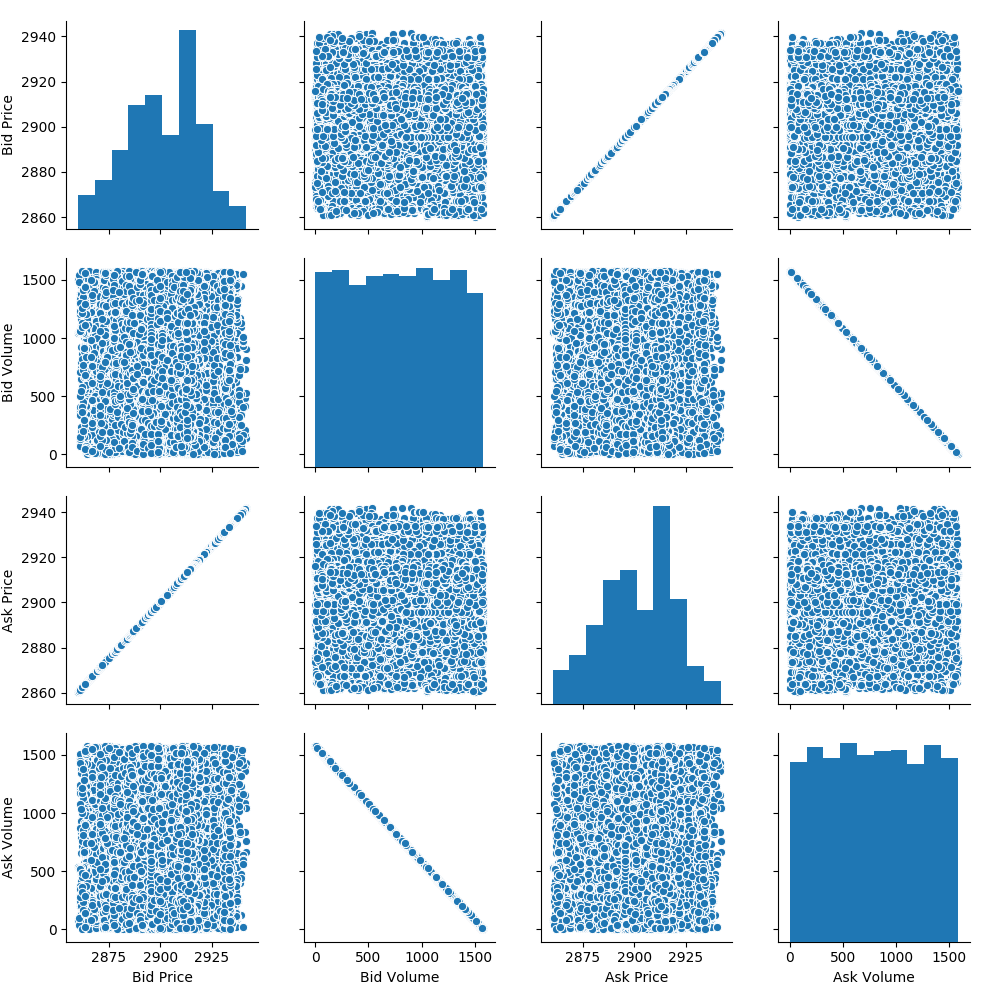

In [16]:
g = sns.pairplot(market[market['Instrument'] == 'SP-FUTURE'])

<IPython.core.display.Javascript object>


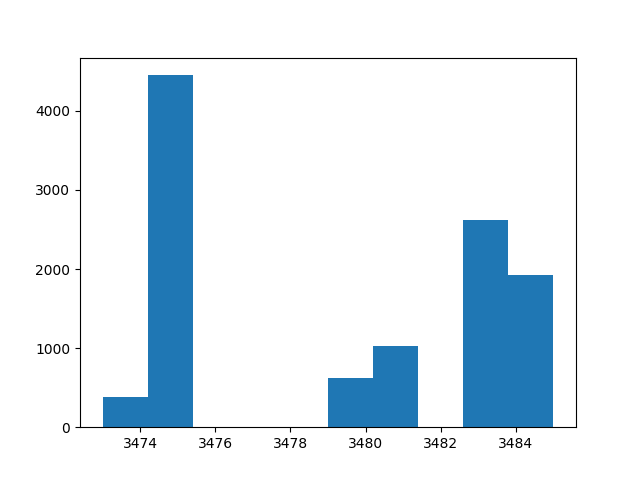

(array([ 385., 4451.,    0.,    8.,    0.,  625., 1028.,    0., 2618.,
        1922.]),
 array([3473. , 3474.2, 3475.4, 3476.6, 3477.8, 3479. , 3480.2, 3481.4,
        3482.6, 3483.8, 3485. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.figure()
plt.hist(market[market['Instrument'] == 'ESX-FUTURE']['Bid Volume']+ market[market['Instrument'] == 'ESX-FUTURE']['Ask Volume'])